In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

url = 'https://raw.githubusercontent.com/emersson6/data_science/main/Desafio_2/datos_de_venta.csv'
df = pd.read_csv(url, index_col=0, sep=';')
df['product_quantity'] = df['product_quantity'].astype(int)
df['Fecha'] = pd.to_datetime(df['Fecha'])
df['Year'] = df['Fecha'].dt.year
df['Month'] =df['Fecha'].dt.month

df.head(5)

C:\Users\evidal\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '23-10-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\evidal\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '18-02-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\evidal\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '30-06-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\evidal\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '22-02-2021' in DD/MM/YYYY format. Provide format or sp

,Fecha,reference,Id_Cliente,Cliente,product_reference,product_name,product_quantity,total_price_tax_incl,Total Pagado,Total sin Recargos,Costo Envio,Descuentos,Cod_Autorizacion,payment,Direccion,Ciudad,Year,Month
Orden,,,,,,,,,,,,,,,,,,
14181,2020-09-06,QHCQNPRWD,4878,MARIA ANTONIETA PINO,1142475,Molu Pinot Noir Bot ScrCap 6x750,1,20940,20940,20940,0,0,NaN,Webpay Plus,Arturo Prat 4988,Renca,2020,9
14661,2020-12-07,ETUBXAFZD,4878,MARIA ANTONIETA PINO,1142475,Molu Pinot Noir Bot ScrCap 6x750,1,20940,20940,20940,0,0,NaN,Webpay Plus,Arturo Prat 4988,Renca,2020,12
16522,2020-10-23,BRFJVAQNA,4878,MARIA ANTONIETA PINO,1142146,Reserva Carmenere Bot 12x750 Oct-Rosa,1,39960,39960,39960,0,0,NaN,Webpay Plus,"Avda Providencia 1120, local 61, Providencia","Santiago, Providencia",2020,10
17596,2021-02-18,LBLLKPNNK,4878,MARIA ANTONIETA PINO,1142083,Reserva Carmenere Bot 6x750,1,18540,18540,18540,0,0,NaN,Pagos por transferencia bancaria,"Avenida Providencia 1120, local 61",providencia,2021,2
19939,2021-06-30,UORDMDNIF,4878,MARIA ANTONIETA PINO,1142082,Reserva Carmenere Bot 12x750,1,39960,39960,39960,0,0,NaN,Pagos por transferencia bancaria,Arturo Prat 4988,Renca,2021,6


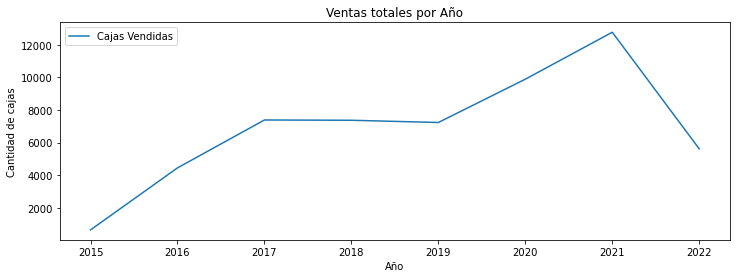

In [10]:
df_data_graf_1 = df[['Year','product_quantity']]
df_data_graf_1.groupby('Year')

graf_anual_01 = df_data_graf_1.groupby("Year")
df_graf_anual = graf_anual_01.sum()
df_graf_anual

x = df_graf_anual.index
y = df_graf_anual.sum(axis='columns')

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(x, y, label='Cajas Vendidas')
ax.set_xlabel('Año')                  
ax.set_ylabel('Cantidad de cajas')
ax.set_title('Ventas totales por Año')
ax.legend() 


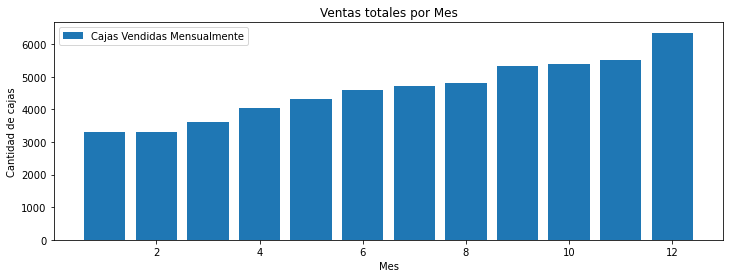

In [37]:
df_data_graf_2 = df[['Month','product_quantity']]
df_data_graf_2.groupby('Month')

graf_anual_02 = df_data_graf_2.groupby("Month")
df_graf_mensual = graf_anual_02.sum()
df_graf_mensual

x = df_graf_mensual.index
y = df_graf_mensual.sum(axis='columns')

fig, ax = plt.subplots(figsize=(12, 4))
ax.bar(x, y, label='Cajas Vendidas Mensualmente')
ax.set_xlabel('Mes')                  
ax.set_ylabel('Cantidad de cajas')
ax.set_title('Ventas totales por Mes')
ax.legend() 

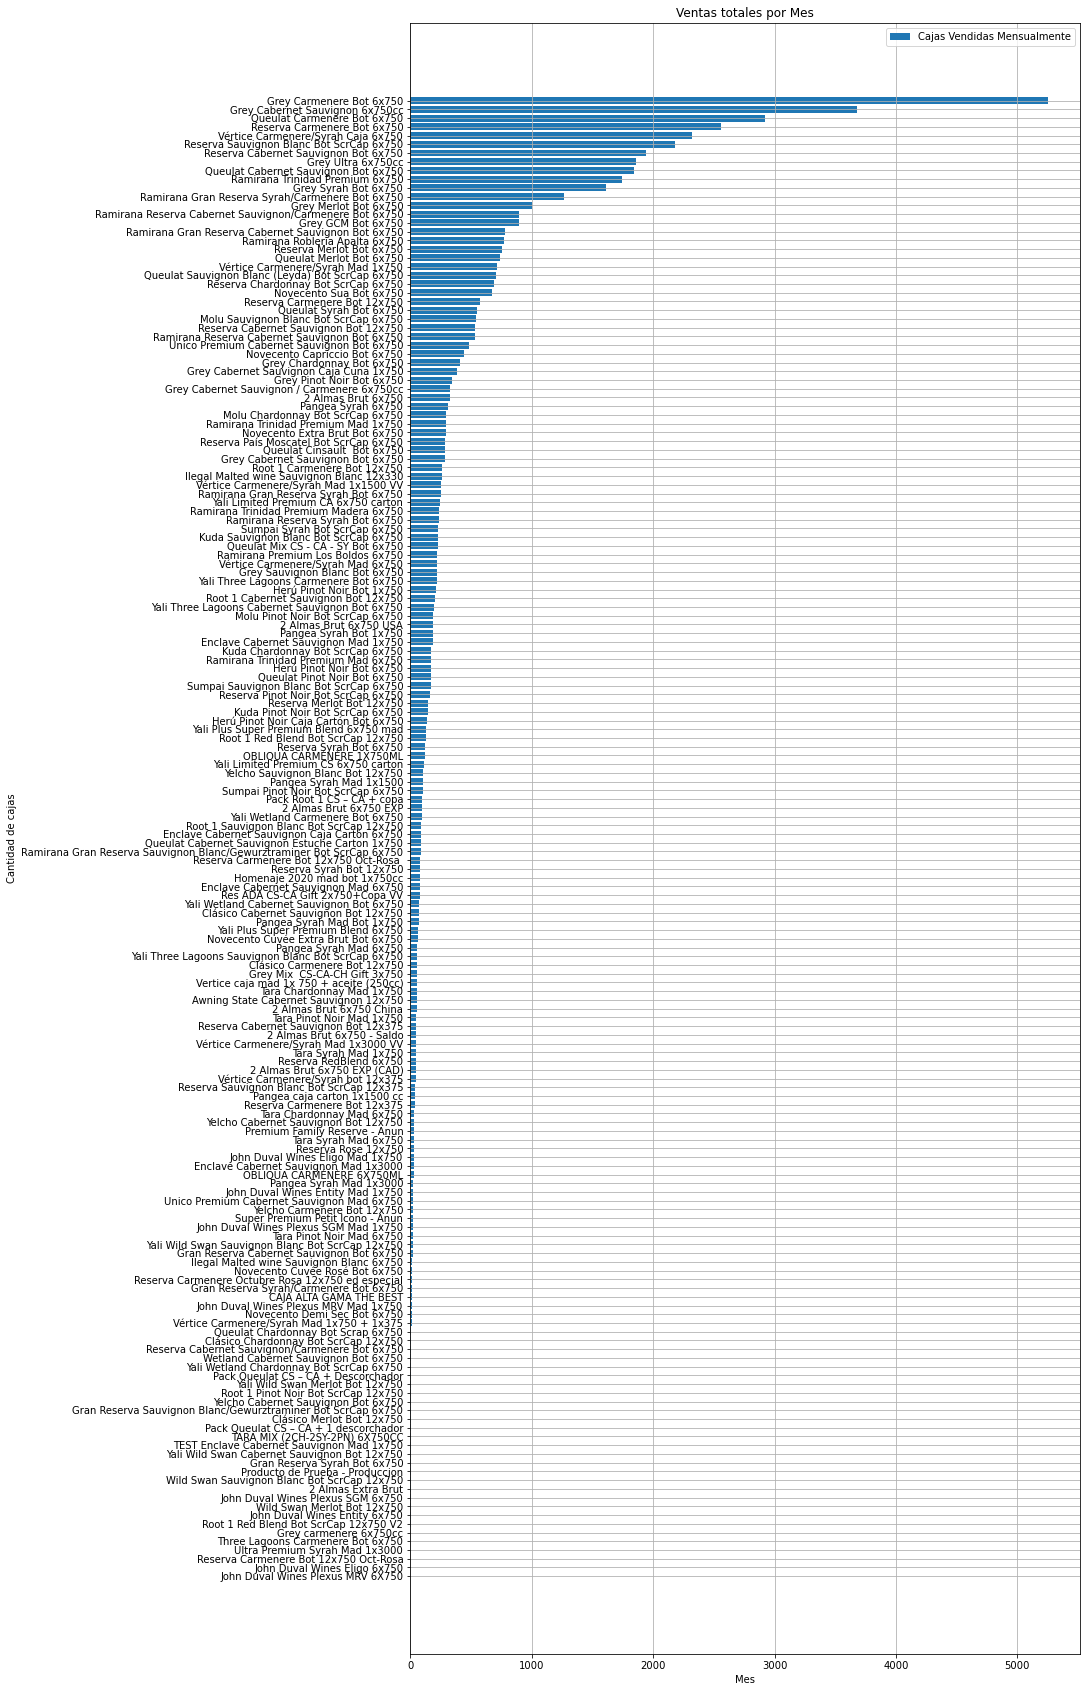

In [52]:
df_data_graf_3 = df[['product_name','product_quantity']]
df_data_graf_3.groupby('product_name')

graf_anual_03 = df_data_graf_3.groupby("product_name")
df_graf_product = graf_anual_03.sum()
df_graf_product

df_graf_product = df_graf_product.sort_values('product_quantity')

x = df_graf_product.index
y = df_graf_product.sum(axis='columns')

fig, ax = plt.subplots(figsize=(12, 30))
ax.barh(x,y,label='Cajas Vendidas Mensualmente')
ax.set_xlabel('Mes')                  
ax.set_ylabel('Cantidad de cajas')
ax.set_title('Ventas totales por Mes')
ax.legend()
ax.grid(True)